# Pymaceuticals Inc.


## Analysis
## Positive Correlation Between Mouse Weight and Tumor Volume:
### The scatter plot and linear regression line show a positive relationship between mouse weight and average tumor volume under the Capomulin regimen. This suggests that as the given mouse's weight increases, the average tumor volume tends to increase as well.

## Effectiveness of Capomulin:
### An analysis of the tumor volume data for mice treated with Capomulin suggests that this drug regimen may significantly influence tumor growth. Further statistical tests, such as comparing tumor volumes before and after treatment, could provide additional insights into the effectiveness of Capomulin.

## Potential Outliers:
### The IQR analysis for various drug regimens helps detect potential outliers in the tumor volume data. These outliers may reflect differences in how individual mice respond to the treatment or result from other experimental factors.

In [2]:
## Prepare the Data

In [3]:
# dependencies and setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# establish paths for the study data files
mouse_metadata_path = "resources/Mouse_metadata.csv"
study_results_path = "resources/Study_results.csv"

# read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# combine the data into a single dataset
combined_data = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# display the data table for preview
combined_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [4]:
# confirm the number of mice in the data
mice_count = combined_data["Mouse ID"].nunique()

In [5]:
# identify unique values - specific to Mouse ID and Timepoint

# locate the duplicate mice by ID number that are present in the Mouse ID and Timepoint 
duplicates = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"])]
duplicates = duplicates["Mouse ID"].unique()
duplicates

# obtain and display the data for the duplicate Mouse ID
duplicates_data = combined_data[combined_data["Mouse ID"].isin(duplicates)]
duplicates_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# create a new dataframe eliminating the duplicate mouse
clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicates)]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
# perform a new count to confirm the duplicate is removed 
clean_mice_count = clean_data["Mouse ID"].nunique()
clean_mice_count

248

In [8]:
## Summary Statistics

In [9]:
# generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# using groupby and summary statistical methods to calculate the following properties of each drug regimen:
    # mean, median, variance, standard deviation, and SEM of the tumor volume.
    # assemble the resulting series into a single summary DataFrame.

summary_stats=clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(
    Mean="mean", 
    Median="median", 
    Variance="var", 
    StdDev="std", 
    SEM=lambda x:x.std()/np.sqrt(len(x))).reset_index()

#set the index to Drug Regimen
summary_stats.set_index("Drug Regimen", inplace=True)

#display the summary stats
summary_stats

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [10]:
# Using the aggregation method, produce the same summary statistics in a single line
summary_stats_agg = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(["mean", "median", "var", "std", lambda x: x.std()/np.sqrt(len(x))])
summary_stats_agg.columns = ["Mean", "Median", "Variance", "StdDev", "SEM"]
summary_stats_agg

,Mean,Median,Variance,StdDev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [11]:
## Bar and Pie Charts

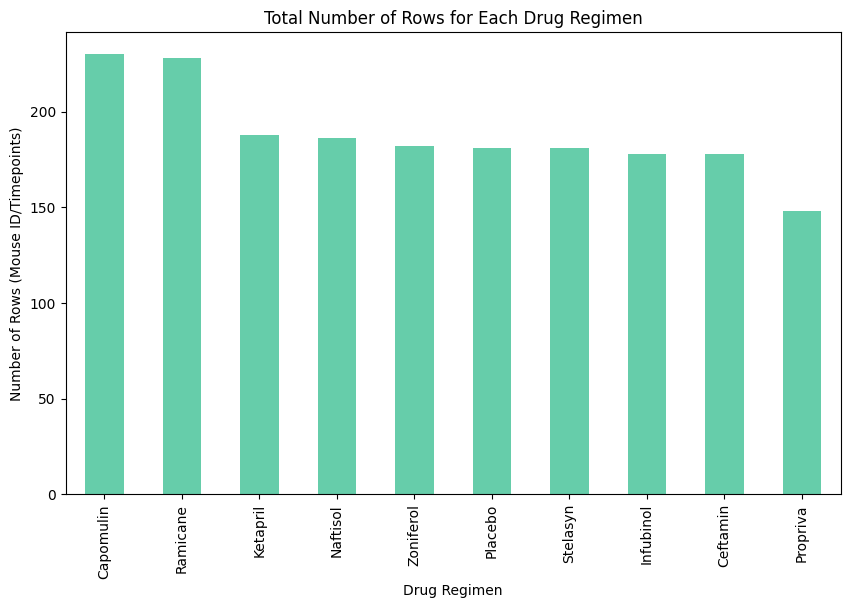

In [12]:
# generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using *pandas*

drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

# generate the bar plot
drug_regimen_counts.plot(kind='bar', figsize=(10,6), color="mediumaquamarine")

# add labels and title
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.title("Total Number of Rows for Each Drug Regimen")

# display the graph
plt.show()

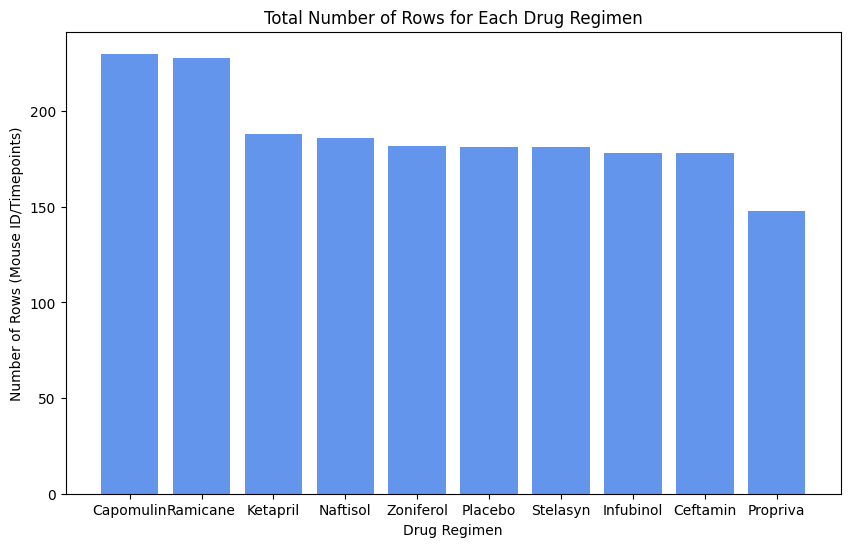

In [26]:
# generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using *pyplot*

#calculate the total number of rows for each drug regimen
drug_regimen_counts = clean_data["Drug Regimen"].value_counts()

#generate the bar plot
plt.figure(figsize=(10,6))
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color="cornflowerblue")
plt.title("Total Number of Rows for Each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Rows (Mouse ID/Timepoints)")
plt.show()

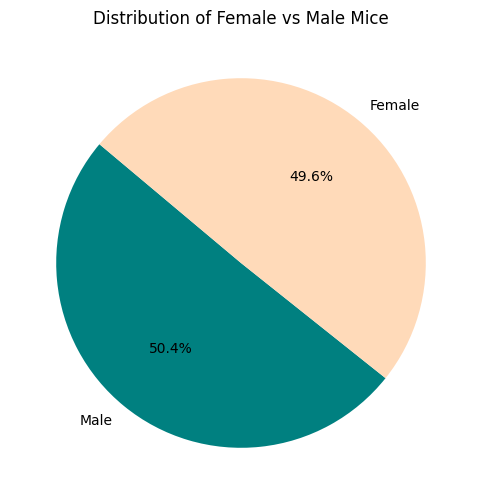

In [14]:
# generate a pie chart, using *pandas*, showing the distribution of unique female versus male mice used in the study

# get the unique mice with their gender
xy_xx_mice = clean_data.drop_duplicates(subset="Mouse ID")
# get the count
gender_counts = xy_xx_mice["Sex"].value_counts()

# make and display the pie chart
plt.figure(figsize=(8,6))
gender_counts.plot(kind='pie', autopct="%1.1f%%", colors=["teal", "peachpuff"], startangle=140)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()

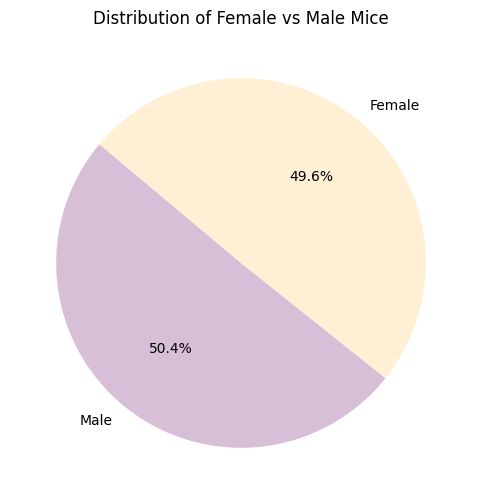

In [15]:
# generate a pie chart, using *pyplot*, showing the distribution of unique female versus male mice used in the study
# get the unique mice with their gender
gender_counts_pyplot = gender_counts.values

# make and display the pie chart
labels=["Male", "Female"]
sizes=gender_counts_pyplot
colors=["thistle", "papayaWhip"]

plt.figure(figsize=(8,6))
plt.pie(sizes, labels=labels, colors=colors, autopct="%1.1f%%", startangle=140)
plt.title("Distribution of Female vs Male Mice")
plt.show()


In [16]:
## Quartiles, Outliers and Boxplots

In [17]:
# calculate the final tumor volume of each mouse across four of the treatment regimens:
    # Capomulin, Ramicane, Infubinol, and Ceftamin

# get the last (greatest) timepoint for each mouse
max_timepoint = clean_data.groupby("Mouse ID")["Timepoint"].max()

# merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volume = pd.merge(max_timepoint, clean_data, on=["Mouse ID", "Timepoint"])

In [18]:
#build the list of treatments
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []


# calculate the IQR and quantitatively determine if there are any potential outliers
for treatment in treatments:
    treatment_data=clean_data[clean_data["Drug Regimen"]==treatment]["Tumor Volume (mm3)"]
    Q1 = treatment_data.quantile(0.25)
    Q3 = treatment_data.quantile(0.75)
    IQR = Q3 - Q1

    # locate the rows which contain mice on each drug and get the tumor volumes
    tumor_vol_data.append(treatment_data)

    # add subset
    subset = treatment_data[(treatment_data < (Q1 - 1.5 * IQR)) | (treatment_data > (Q3 + 1.5 * IQR))]
    if len(subset)>0:
        print(f"{treatment} has potential outliers: {subset.values}")
    else:
        print(f"{treatment} has no potential outliers")

    # determine outliers using upper and lower bounds
        lower_bound = Q1 - (1.5*IQR)
        upper_bound = Q3 + (1.5*IQR)

Capomulin has potential outliers: [25.47214326 23.34359787]
Ramicane has potential outliers: [22.05012627]
Infubinol has no potential outliers
Ceftamin has no potential outliers


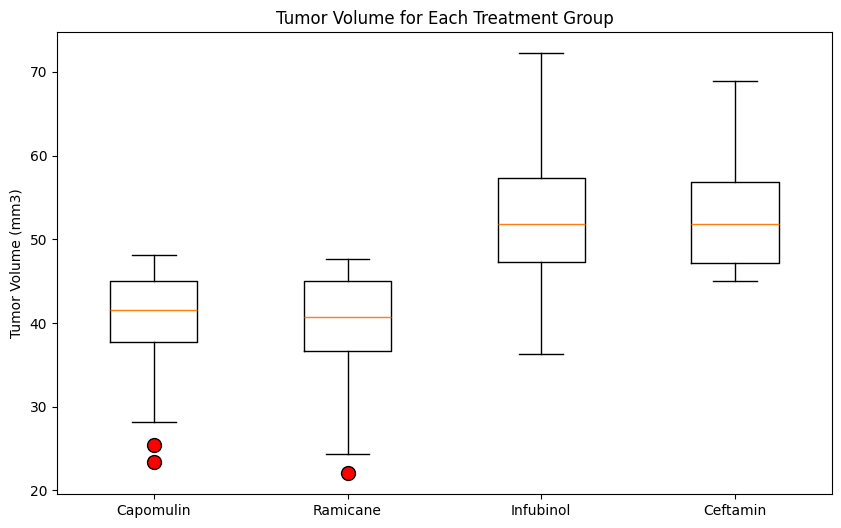

In [19]:
# generate and display a box plot that shows the distribution of the tumor volume for each treatment group.
plt.figure(figsize=(10,6))
plt.boxplot(tumor_vol_data, labels=treatments, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.title("Tumor Volume for Each Treatment Group")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

In [20]:
## Line and Scatter Plots

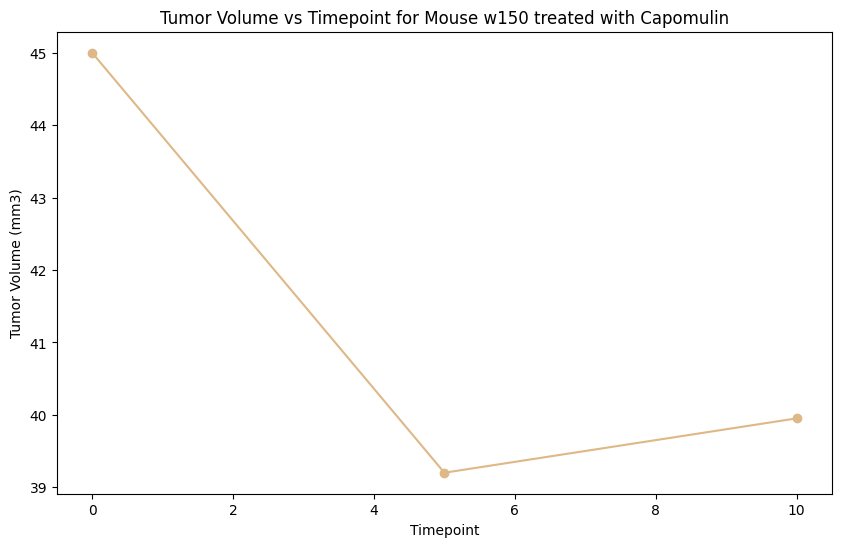

In [21]:
# generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
 
# locate the Capomulin data
capomulin_data = clean_data[clean_data["Drug Regimen"]=="Capomulin"]

# select a mouse treated with Capomulin
capomulin_mouse = capomulin_data.sample(3)["Mouse ID"].values[0]

# obtain the data for the mouse
capomulin_mouse_data = clean_data[clean_data["Mouse ID"]==capomulin_mouse]

# make and display the line plot
plt.figure(figsize=(10,6))
plt.plot(capomulin_mouse_data["Timepoint"], capomulin_mouse_data["Tumor Volume (mm3)"], marker='o', color="burlywood")
plt.title(f"Tumor Volume vs Timepoint for Mouse {capomulin_mouse} treated with Capomulin")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

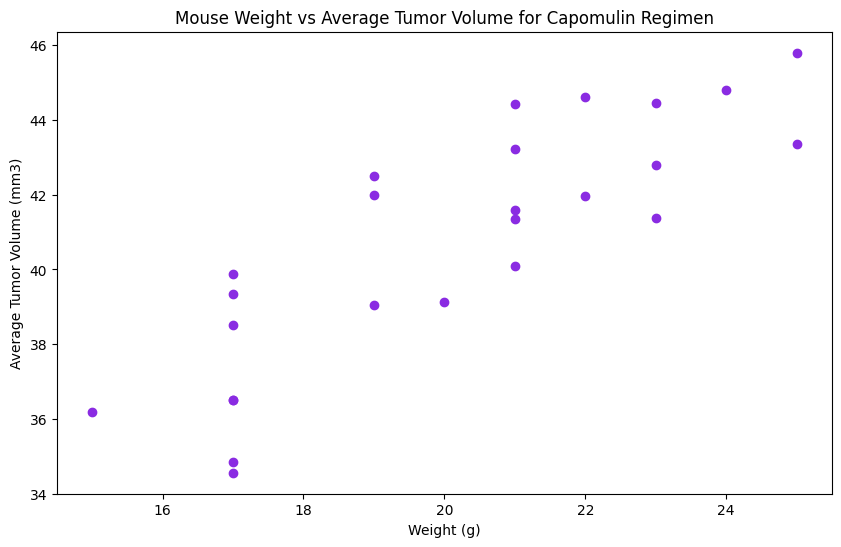

In [22]:
# generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# get the average tumor volume for each mouse
avg_tumor_vol = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()

# get the weight of each mouse
mouse_weight = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

# make and display the scatter plot
plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_vol, color="blueviolet")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

In [23]:
## Correlation and Regression

In [24]:
# calculate the correlation coefficient and a linear regression model for mouse weight and average tumor volume for the Capomulin regimen
correlation = st.pearsonr(mouse_weight, avg_tumor_vol)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")

The correlation between mouse weight and average tumor volume is 0.84


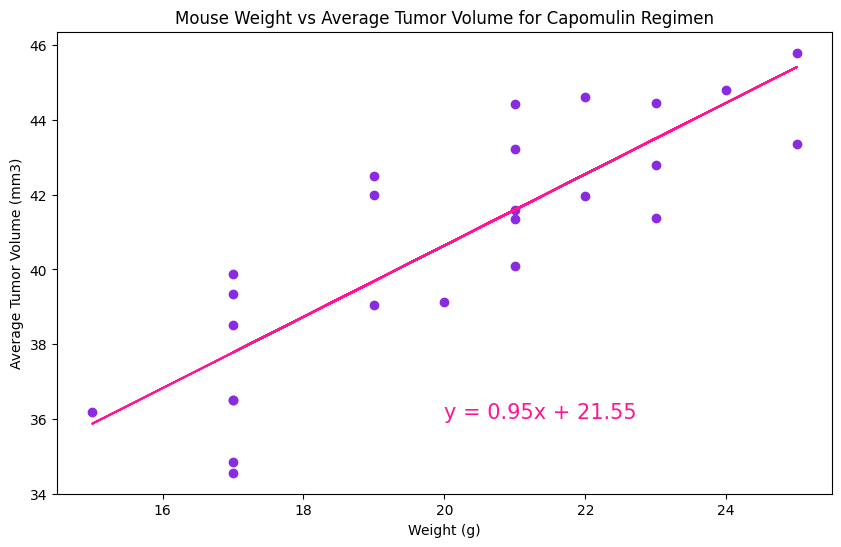

In [25]:
#plot the linear regression model on top of the previous scatter plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(mouse_weight, avg_tumor_vol)
regress_values = mouse_weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.figure(figsize=(10,6))
plt.scatter(mouse_weight, avg_tumor_vol, color="blueviolet")
plt.plot(mouse_weight, regress_values, color="deeppink")
plt.annotate(line_eq,(20,36),fontsize=15,color="deeppink")
plt.title("Mouse Weight vs Average Tumor Volume for Capomulin Regimen")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()